# **Part 02 CNN with keras**

# Chapter 2. CNN with keras

## 2-1. CNN with keras
- 케라스는 인공지능 코딩을 쉽게 할 수 있는 파이썬 라이브러리
- 인공지능 엔진 프로그램을 호출하여 인공지능 알고리즘을 수행
- 하위 레벨 계싼을 직접 수행하지 않지만 상위 레벨 인터페이스를 제공

### 케라스로 ANN 구현하기
- 인공지능을 케라스로 구현하는 방법
    - 함수형 구현
        - ANN 모델을 직접 설계하는 인공지능 전문가에게 적합
    - 객체지향형 구현
        - 전문가가 만들어 놓은 ANN 모델을 사용하는 사용자에게 적합
    - 분산방식과 연쇄방식, 혼합방식으로 구현
        - 분산방식은 구조가 복잡한 경우에 적합
        - 연쇄방식은 하나의 순서로 구성된 간단한 신경망 구현에 적합

### 케라스 프로그램 작성 단계
1. 인공지능 구현용 패키지 불러오기
    - `keras.layers`는 각 계층을 만드는 모듈
    - `keras.models`는 각 layers를 연결하여 신경망 모델을 만든 후 컴파일, 학습
2. 인공지능에 필요한 파라미터 설정
    - `Nin`, `Nh`, `number_of_class`, `Nout`
3. 인공지능 모델 구현
4. 학습과 성능 평가용 데이터 불러오기
5. 인공지능 학습 및 성능 분석

In [1]:
from keras import layers, models # Layers는 각 계층을 만드는 모듈
                                 # Moduls는 각 layers를 연결하여 신경망 모델을 만든 후 컴파일, 학습

Using TensorFlow backend.


- 분산방식 모델링

In [ ]:
x = layers.Input(shape=(Nin,))
h = layers.Activation('relu')(layers.Dense(Nh)(x))
y = layers.Activation('softmax')(layers.Dense(Nout)(h))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

-  연쇄방식 모델링을 포함하는 함수형 표현

In [ ]:
model = models.Sequential()
model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, )))
model.add(layers.Dense(Nout, activation='softmax', metrics=['accuracy']))

- 분산방식 모델링을 포함하는 객체지향형 구현

In [ ]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.dense(Nh)
        output = layers.dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        super().__init__(x, y)

model = ANN(Nin, Nh, Nout)

- 연쇄방식 모델링을 포함하는 객체지향형 구현

In [ ]:
class ANN_seq_class(models.Sequential()):
    def __init__(self, Nin, Nh, Nout):
        super().__init__(x, y)
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, )))
        self.add(layers.Dense(Nout, activation='softmax', metrics=['accuracy']))

model = ANN_seq_class(Nin, Nh, Nout)

## CIFAR dataset
- CIFAR-10 : 60,000개의 32x32 컬러 이미지, 10개의 레이블
    - 한 개의 레이블 당 6,000개의 이미지
    - 50,000개의 Training Image, 10,000개의 Test Image
    - Test Batch에는 1,000개의 랜덤하게 선택된 이미지가 있다
- CIFAR-100 : 60,000개의 32x32 컬러 이미지, 100개의 레이블
    - 500개의 Training Image, 100개의 Test Image

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 198s 1us/step


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [12]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

## 케라스 창시자에게 배우는 딥러닝
- 위 책의 예제로 진행.
- 50,000개 대신에 6,000개만 진행

In [2]:
import keras
keras.__version__

'2.2.4'

### 데이터 내려받기

In [3]:
import os, shutil

In [4]:
# 원본 데이터셋을 압축 해제한 디렉토리 경로
original_dataset_dir = 'C:/workspace/006975/datasets/cats_and_dogs/train/'
original_dataset_dir

'C:/workspace/006975/datasets/cats_and_dogs/train/'

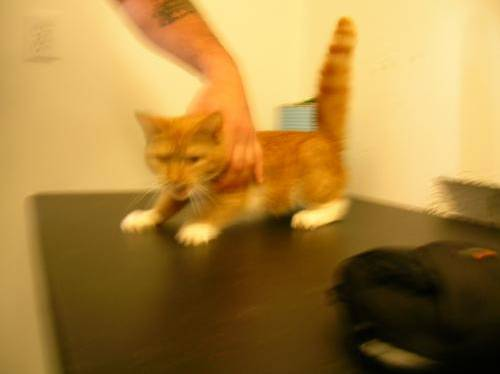

In [5]:
from PIL import Image
Image.open(original_dataset_dir + 'cat.0.jpg')

In [6]:
# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/'.join(original_dataset_dir.split('/')[:-2]) + '_small'
if os.path.exists(base_dir): # 반복적인 실행을 위해 디렉토리를 삭제
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않음
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

# from keras import layers
# from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [9]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6895 - acc: 0.5345 - val_loss: 0.6734 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 6s 57ms/step - loss: 0.6593 - acc: 0.6130 - val_loss: 0.6465 - val_acc: 0.6160A: 1s - loss: 0.6629 -
Epoch 3/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6199 - acc: 0.6605 - val_loss: 0.6646 - val_acc: 0.5910 2s 
Epoch 4/30
100/100 [==============================] - 6s 58ms/step - loss: 0.5784 - acc: 0.6960 - val_loss: 0.6077 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5515 - acc: 0.7240 - val_loss: 0.5886 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5183 - acc: 0.7365 - val_loss: 0.5804 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 6s 59ms/step - loss: 0.4921 - acc: 0.7645 - val_loss: 0.6578 - val_acc: 

In [13]:
model.save('cats_and_dogs_small_1.h5')

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

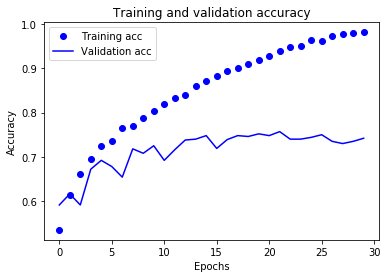

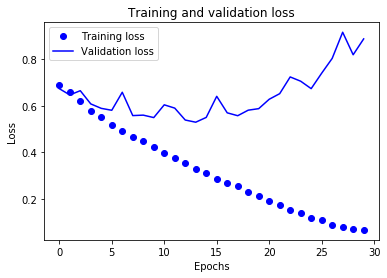

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend()

plt.show()

## 데이터 증식 (Auto Encoder / Augmentation)

- The usage of the `ImageDataGenerator` class is as follows.
    1. Load you dataset
    2. Configure the `ImageDataGenerator` (e.g. construct an instance)
    3. Calculate image statistics (e.g. call the fit() function)
    4. Use the generator to fit the model (e.g. pass the instance to the `fit_generator()` function)

- it supports a number of pixel scaling methods, as well as a range of _data augmentation techniques_

- The three main types of pixel scaling techniques supported by the `ImageDataGenerator` class are as follows;
    1. Pixel Normalization : scale pixel values to the range 0-1
    2. Pixel Centering : scale pixel values to have a zero mean
    3. Pixel Standardization : scale pixel values to have a zero mean and unit variance

- pixel scaling techniques supports two levels: either per-image(called sample-wise) or per-dataset(called feature_wise).

```python
keras.preprocessing.image.ImageDataGenerator    # Class
ImageDataGenerator(
    featurewise_center=False,              # Boolean, Set input mean to 0, feature-wise
    samplewise_center=False,               # Boolean, Set each sample mean to 0
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0, 
    width_shift_range=0.0, 
    height_shift_range=0.0, 
    brightness_range=None, 
    shear_range=0.0, 
    zoom_range=0.0, 
    channel_shift_range=0.0, 
    fill_mode='nearest', 
    cval=0.0, 
    horizontal_flip=False, 
    vertical_flip=False, 
    rescale=None, 
    preprocessing_function=None, 
    data_format=None, 
    validation_split=0.0, 
    dtype=None)
```

```python
ImageDataGenerator(
      rotation_range=40,      # 랜덤하게 사진을 회전시킬 각도 범위(0~180도 사이)
      width_shift_range=0.2,  # 사진을 수평으로 랜덤하게 평행 이동시킬 범위
                              # (전체 넓이에 대한 비율)
      height_shift_range=0.2, # 사진을 수직으로 랜덤하게 평행 이동시킬 범위
                              # (전체 넓이에 대한 비율)
      shear_range=0.2,        # 랜덤하게 전단 변환을 적용할 각도 범위
      zoom_range=0.2,         # 랜덤하게 사진을 확대할 범위
      horizontal_flip=True,   # 랜덤하게 이미지를 수평으로 뒤집음
                              # 수평 대칭을 가정할 수 있을 때 사용
                              # (예로 풍경/인물 사진)
      fill_mode='nearest'     # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략
)
```

In [16]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [17]:
(1,) + (150, 150, 3)

(1, 150, 150, 3)

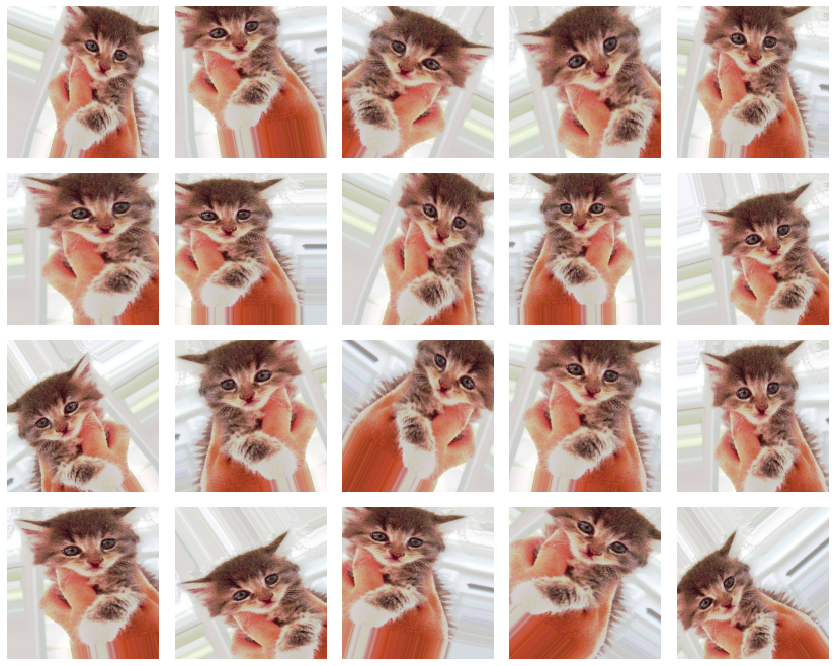

In [90]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

# 파일 path 얻기
fnames = sorted([os.path.join(train_cats_dir, fname) 
                 for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
plt.figure(figsize=(15, 12))
nrows, ncols = 4, 5
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace = 0.1, wspace = 0)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    if i == nrows * ncols - 1:
        break

plt.show()

(10, 150, 150, 3)


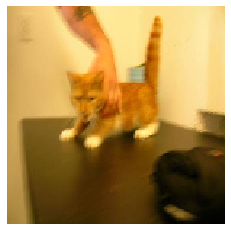

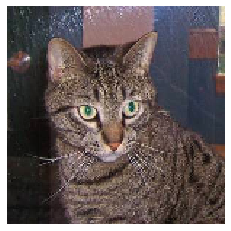

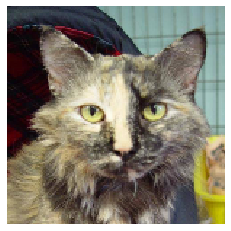

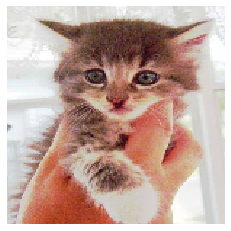

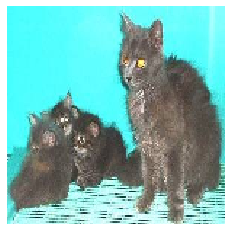

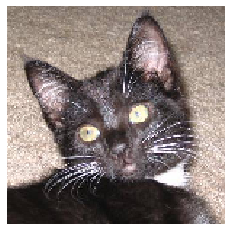

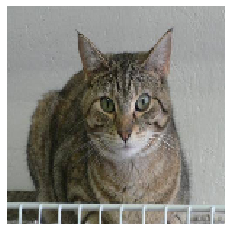

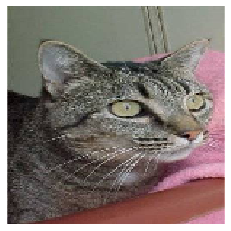

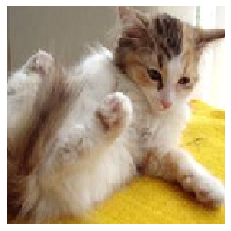

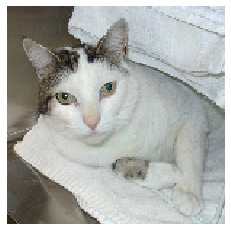

In [123]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

# 파일 path 얻기
fnames = sorted([os.path.join(train_cats_dir, fname) 
                 for fname in os.listdir(train_cats_dir)])


img_path = fnames[:10]

y = np.array([]).reshape(0, 150, 150, 3)
for i in range(len(img_path)):
    img = image.load_img(img_path[i], target_size=(150, 150))
    x = image.img_to_array(img).reshape(1, 150, 150, 3)
    y = np.concatenate((y, x), axis=0)
print(y.shape)

for x in y:
    plt.imshow(image.array_to_img(x)); plt.axis('off'); plt.show()

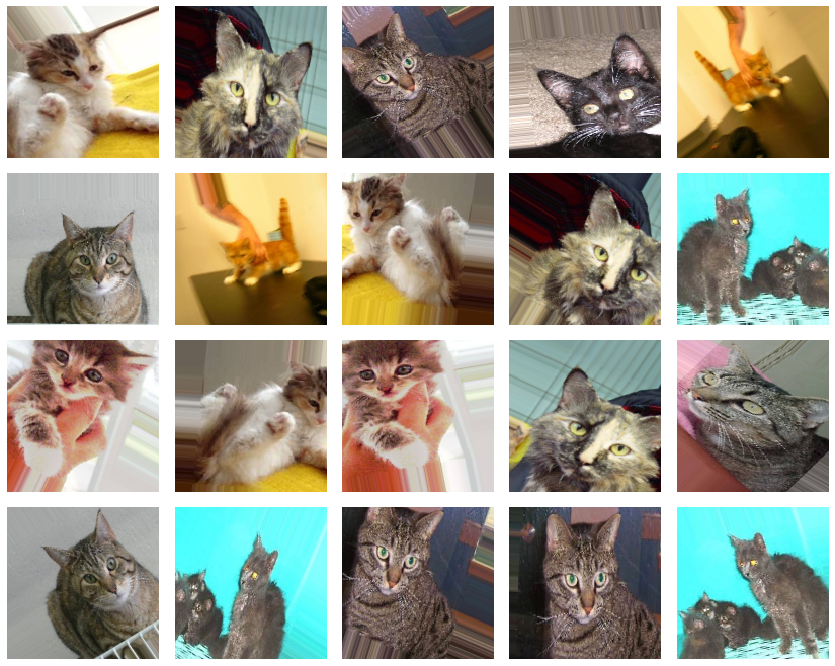

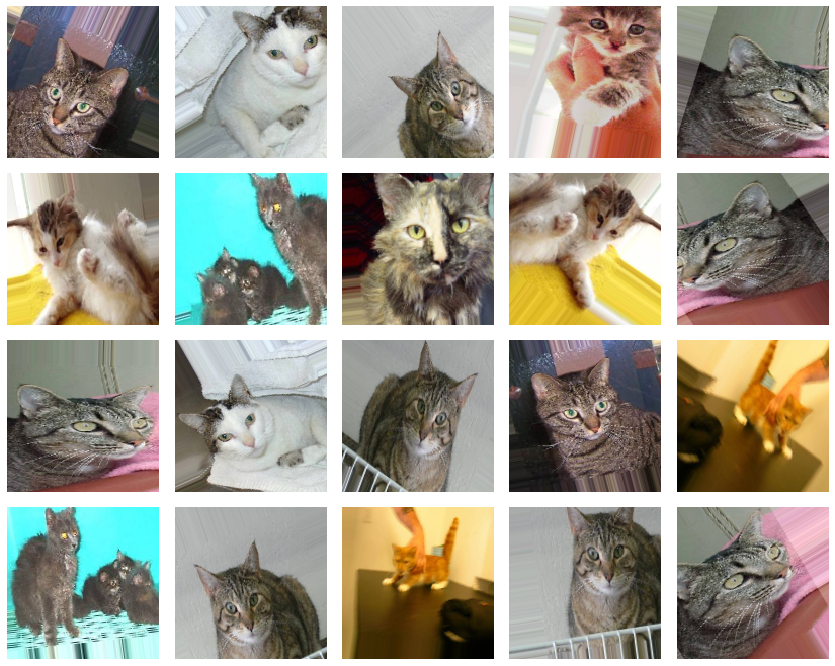

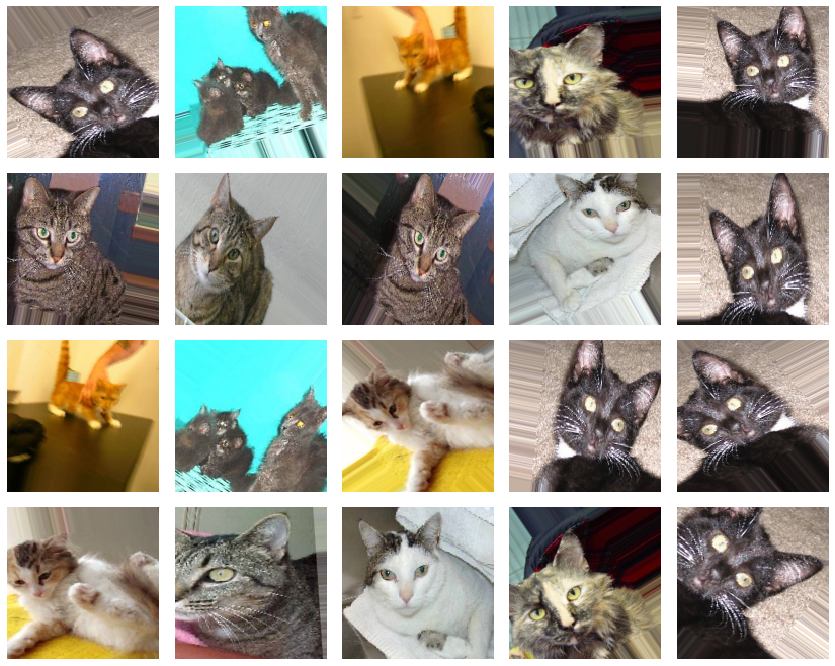

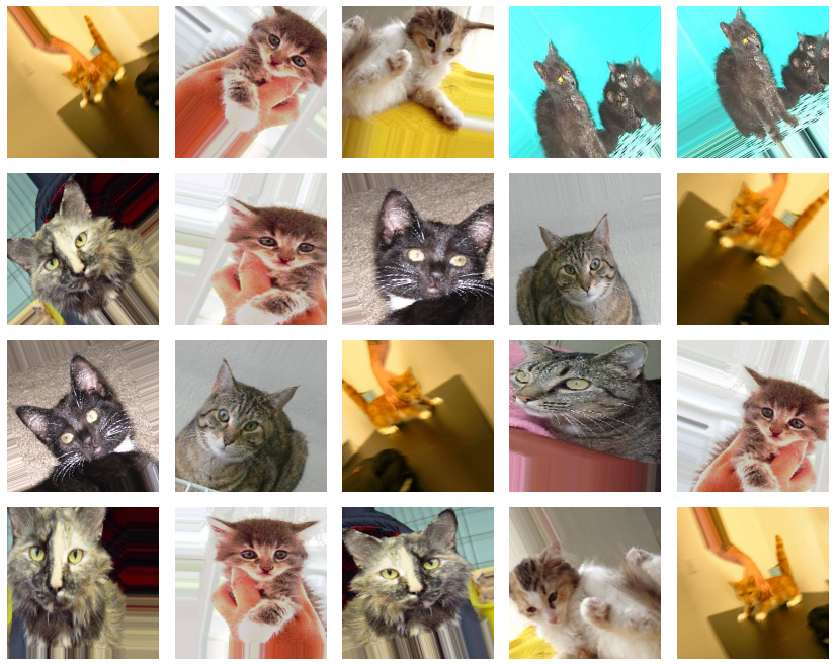

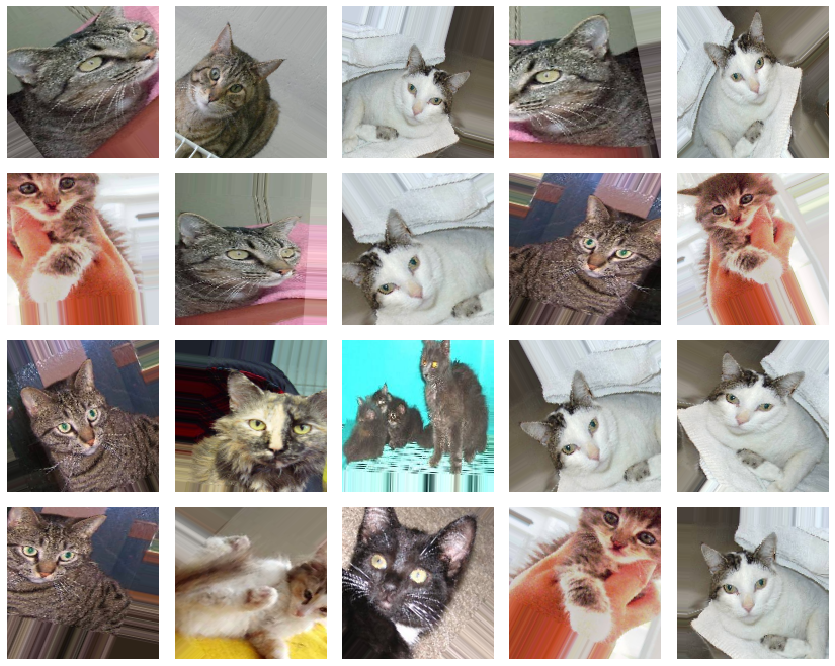

In [145]:
shuffle = True

np.random.seed(42)
plt.figure(figsize=(15, 12))
nrows, ncols = 4, 5
for i, batch in enumerate(datagen.flow(y, batch_size=5, shuffle=shuffle)):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace = 0.1, wspace = 0)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    if i == nrows * ncols - 1:
        break

plt.show()

np.random.seed(42)
plt.figure(figsize=(15, 12))
nrows, ncols = 4, 5
for i, batch in enumerate(datagen.flow(y, batch_size=5, shuffle=shuffle)):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace = 0.1, wspace = 0)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.imshow(image.array_to_img(batch[1]))
    plt.axis('off')
    if i == nrows * ncols - 1:
        break

plt.show()

np.random.seed(42)
plt.figure(figsize=(15, 12))
nrows, ncols = 4, 5
for i, batch in enumerate(datagen.flow(y, batch_size=5, shuffle=shuffle)):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace = 0.1, wspace = 0)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.imshow(image.array_to_img(batch[2]))
    plt.axis('off')
    if i == nrows * ncols - 1:
        break

plt.show()

np.random.seed(42)
plt.figure(figsize=(15, 12))
nrows, ncols = 4, 5
for i, batch in enumerate(datagen.flow(y, batch_size=5, shuffle=shuffle)):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace = 0.1, wspace = 0)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.imshow(image.array_to_img(batch[3]))
    plt.axis('off')
    if i == nrows * ncols - 1:
        break

plt.show()

np.random.seed(42)
plt.figure(figsize=(15, 12))
nrows, ncols = 4, 5
for i, batch in enumerate(datagen.flow(y, batch_size=5, shuffle=shuffle)):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace = 0.1, wspace = 0)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.imshow(image.array_to_img(batch[4]))
    plt.axis('off')
    if i == nrows * ncols - 1:
        break

plt.show()

In [104]:
type(img)

PIL.Image.Image

In [91]:
x.shape

(1, 150, 150, 3)

In [99]:
import numpy as np
x = np.random.randint(0, 255, size=(1, 150, 150, 3)) / 255
x.shape

(1, 150, 150, 3)

In [101]:
for i, batch in enumerate(datagen.flow(x, batch_size=5)):
    if i == 20: break
    print(batch[0].shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


(2, 150, 150, 3)
(150, 150, 3)


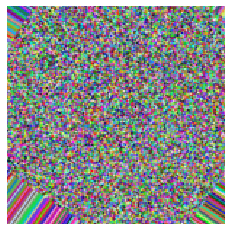

(2, 150, 150, 3)
(150, 150, 3)


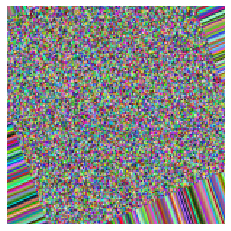

(2, 150, 150, 3)
(150, 150, 3)


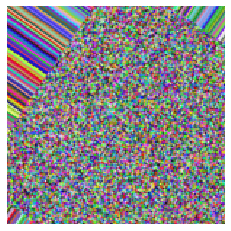

(2, 150, 150, 3)
(150, 150, 3)


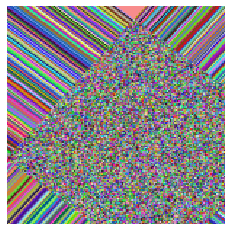

(2, 150, 150, 3)
(150, 150, 3)


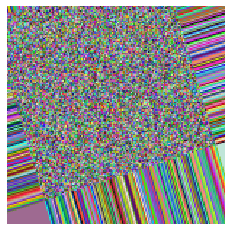

In [93]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
for i, batch in enumerate(datagen.flow(x, batch_size=2)):
    if i == 5:
        break
    print(batch.shape)
    print(batch[0].shape)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    plt.show()

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                    input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# 학습 시작
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 26s 265ms/step - loss: 0.6929 - acc: 0.5063 - val_loss: 0.6826 - val_acc: 0.5114
Epoch 2/100
100/100 [==============================] - 20s 197ms/step - loss: 0.6784 - acc: 0.5690 - val_loss: 0.6609 - val_acc: 0.6018
Epoch 3/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6648 - acc: 0.5841 - val_loss: 0.6584 - val_acc: 0.5755
Epoch 4/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6505 - acc: 0.6138 - val_loss: 0.6178 - val_acc: 0.6579
Epoch 5/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6315 - acc: 0.6350 - val_loss: 0.6107 - val_acc: 0.6529
Epoch 6/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6221 - acc: 0.6478 - val_loss: 0.5830 - val_acc: 0.6894
Epoch 7/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6048 - acc: 0.6719 -

In [45]:
model.save('cats_and_dogs_small_2.h5')

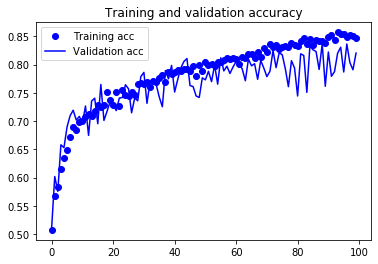

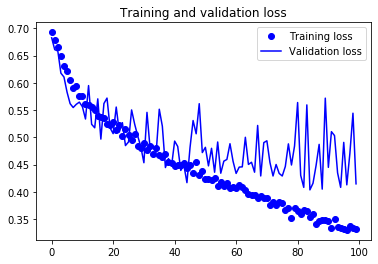

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [86]:
x, y = np.random.randn(5,15,15,3), np.random.randn(5,15,15,3)
np.concatenate((x, y), axis=0).shape

(10, 15, 15, 3)

In [89]:
for i, j in zip([1,2,3],[4,5,6]):
    print(i, j)

1 4
2 5
3 6


## 사전 훈련된 컨브넷 사용하기

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 54s 1us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:\workspace/006975\datasets\cats_and_dogs_small'.replace('\\','/')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [12]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6204 - acc: 0.6555 - val_loss: 0.4720 - val_acc: 0.8160
Epoch 2/30
2000/2000 [==============================] - 1s 391us/step - loss: 0.4453 - acc: 0.8085 - val_loss: 0.3850 - val_acc: 0.8400
Epoch 3/30
2000/2000 [==============================] - 1s 388us/step - loss: 0.3660 - acc: 0.8520 - val_loss: 0.3414 - val_acc: 0.8550
Epoch 4/30
2000/2000 [==============================] - 1s 389us/step - loss: 0.3200 - acc: 0.8700 - val_loss: 0.3225 - val_acc: 0.8600
Epoch 5/30
2000/2000 [==============================] - 1s 391us/step - loss: 0.2996 - acc: 0.8785 - val_loss: 0.2906 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 1s 395us/step - loss: 0.2753 - acc: 0.8850 - val_loss: 

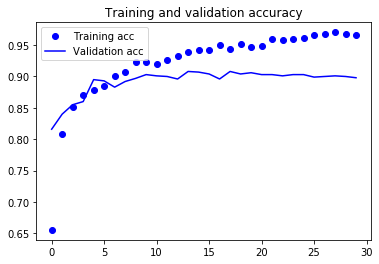

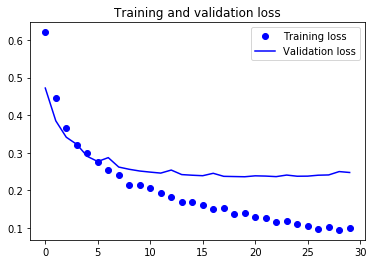

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [16]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [17]:
conv_base.trainable = False

In [18]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 23s - loss: 0.5304 - acc: 0.7500 - val_loss: 0.4020 - val_acc: 0.8450
Epoch 2/30
 - 23s - loss: 0.4012 - acc: 0.8385 - val_loss: 0.3291 - val_acc: 0.8820
Epoch 3/30
 - 26s - loss: 0.3409 - acc: 0.8615 - val_loss: 0.2972 - val_acc: 0.8880
Epoch 4/30
 - 28s - loss: 0.3205 - acc: 0.8715 - val_loss: 0.2766 - val_acc: 0.8950
Epoch 5/30
 - 29s - loss: 0.2967 - acc: 0.8795 - val_loss: 0.2667 - val_acc: 0.8930
Epoch 6/30
 - 31s - loss: 0.2874 - acc: 0.8770 - val_loss: 0.2704 - val_acc: 0.8910
Epoch 7/30
 - 32s - loss: 0.2745 - acc: 0.8885 - val_loss: 0.2522 - val_acc: 0.9010
Epoch 8/30
 - 33s - loss: 0.2663 - acc: 0.8925 - val_loss: 0.2480 - val_acc: 0.8960
Epoch 9/30
 - 33s - loss: 0.2576 - acc: 0.8985 - val_loss: 0.2444 - val_acc: 0.8990
Epoch 10/30
 - 34s - loss: 0.2509 - acc: 0.9005 - val_loss: 0.2450 - val_acc: 0.8970
Epoch 11/30
 - 34s - loss: 0.2472 - acc: 0.9020 - val_loss: 0.2379 - val_ac

In [20]:
model.save('cats_and_dogs_small_3.h5')

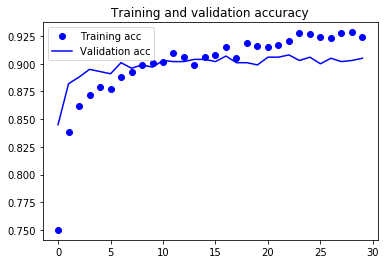

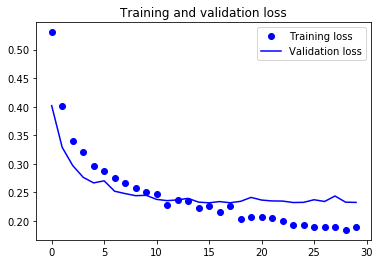

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 미세 조정

In [22]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [23]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 28s 281ms/step - loss: 0.1873 - acc: 0.9240 - val_loss: 0.3199 - val_acc: 0.8830
Epoch 2/100
100/100 [==============================] - 35s 350ms/step - loss: 0.1634 - acc: 0.9335 - val_loss: 0.2560 - val_acc: 0.9070
Epoch 3/100
100/100 [==============================] - 41s 408ms/step - loss: 0.1290 - acc: 0.9485 - val_loss: 0.2163 - val_acc: 0.9150
Epoch 4/100
100/100 [==============================] - 44s 442ms/step - loss: 0.1188 - acc: 0.9575 - val_loss: 0.2219 - val_acc: 0.9250
Epoch 5/100
100/100 [==============================] - 45s 453ms/step - loss: 0.1044 - acc: 0.9590 - val_loss: 0.2211 - val_acc: 0.9190
Epoch 6/100
100/100 [==============================] - 49s 486ms/step - loss: 0.0908 - acc: 0.9655 - val_loss: 0.2185 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 50s 501ms/step - loss: 0.0822 - acc: 0.9705 - val_loss: 0.2256 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

KeyboardInterrupt: 

In [ ]:
model.save('cats_and_dogs_small_4.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)